# Hypo_Marktwain




**Author:** Lailin XU  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Monday, April 19, 2021 at 05:49 PM.</small></i>

In [2]:
import os
from math import sqrt, pow, fabs, comb
import ROOT as R
import itertools

Welcome to JupyROOT 6.26/00


Mark Twain

In [3]:
SAM_A = [0.225, 0.262, 0.217, 0.240, 0.230, 0.229, 0.235, 0.217]

Snodgrass

mean: A= 0.231875, B= 0.2097
se: A= 0.004854837221209838, B= 0.0029130497053532376
Wald test: w=3.916640271758838, se= 0.00566174028283734, p-value= 8.979157914257611e-05
A:  [0.225, 0.262, 0.217, 0.24, 0.23, 0.229, 0.235, 0.217]
B:  [0.209, 0.205, 0.196, 0.21, 0.202, 0.207, 0.224, 0.223, 0.22, 0.201]
Replacement test: t=0.022175
Total number of replacements 43758
t=0.023749999999999993,   2 8 9 10 11 12 13 15 16 17
    0.217 0.209 0.205 0.196 0.21 0.202 0.207 0.223 0.22 0.201
t=0.023525000000000018,   2 8 9 10 11 12 13 14 16 17
    0.217 0.209 0.205 0.196 0.21 0.202 0.207 0.224 0.22 0.201
t=0.02285000000000001,   2 8 9 10 11 12 13 14 15 17
    0.217 0.209 0.205 0.196 0.21 0.202 0.207 0.224 0.223 0.201
t=0.022399999999999975,   5 2 8 9 10 11 12 13 16 17
    0.229 0.217 0.209 0.205 0.196 0.21 0.202 0.207 0.22 0.201
t=0.023749999999999993,   2 8 9 10 11 12 13 15 16 17
    0.217 0.209 0.205 0.196 0.21 0.202 0.207 0.223 0.22 0.201
t=0.023525000000000018,   2 8 9 10 11 12 13 14 16 17
    0.

Info in <TCanvas::Print>: png file t_replacement.png has been created


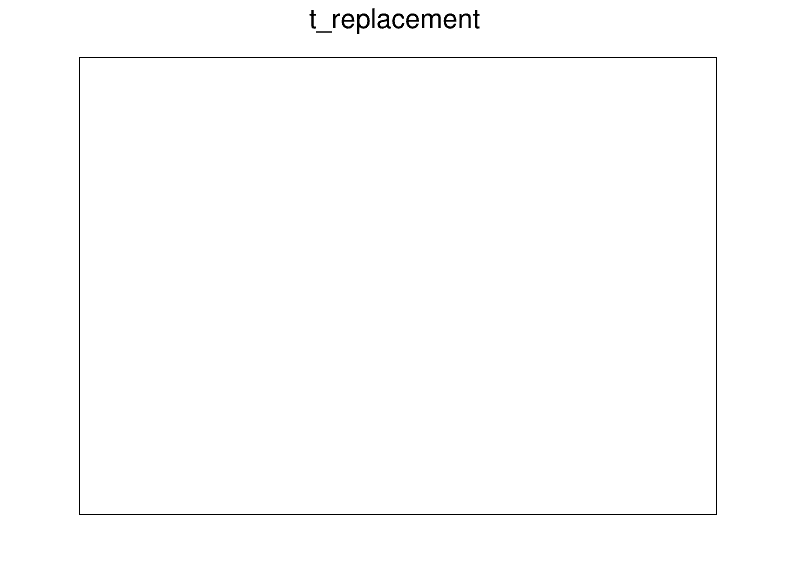

In [4]:
SAM_B = [0.209,0.205,0.196,0.210, 0.202,0.207,0.224, 0.223, 0.220, 0.201]

NA=len(SAM_A)
NB=len(SAM_B)

def get_mean(l):
  """
  get the mean of a list
  """

  n = 0
  for i in l: n += i
  if len(l)==0: return 0
  else: return n/float(len(l))

def get_se(l, opt=0):
  """
  get the standard error
  """

  s = 0
  m = get_mean(l)
  for i in l:
    s += pow( i - m, 2)
  if len(l)<1: return 0
  else:
    ## standard error of the mean
    if opt==0:
      return sqrt(s/float(len(l)*len(l)-1))
    ## sample standard deviation
    if opt==1:
      return sqrt(s/float(len(l)-1))
     

def hypo_wald(theta0=0):
  """
  Wald test
  """

  mean_A = get_mean(SAM_A)
  mean_B = get_mean(SAM_B)
  se_A = get_se(SAM_A, 0)
  se_B = get_se(SAM_B, 0)

  print("mean: A= {0}, B= {1}".format(mean_A, mean_B))
  print("se: A= {0}, B= {1}".format(se_A, se_B))

  theta = mean_A - mean_B
  se = sqrt ( pow(se_A, 2) + pow(se_B, 2) )
  w = (theta - theta0) / se
  
  # p-value
  p = 2 * R.Math.normal_cdf( - fabs(w) )

  print("Wald test: w={0}, se= {1}, p-value= {2}".format(w, se, p))

def hypo_permutation():
 
  mean_A = get_mean(SAM_A)
  mean_B = get_mean(SAM_B)
  tobs = mean_A - mean_B
  print("A: ", SAM_A)
  print("B: ", SAM_B)
  print("Replacement test: t={0}".format(tobs))

  # calculate the number of replacements
  nrep = comb(NA+NB, NA)
  print("Total number of replacements {0}".format(nrep))

  sam_t = []
  
  tfout=R.TFile.Open("t_replacement_comb.root", "RECREATE")
  hname="t_replacement"
  nbins=600
  xmin, xmax=-0.03, 0.03
  ht = R.TH1F(hname, hname, nbins, xmin, xmax)

  iit = 0
  ng = 0
  # mix A and B, then sample a new array
  SAM_AB = list(SAM_A)
  SAM_AB.extend(SAM_B)
  for tip_A in list(itertools.combinations(SAM_AB, NA)):
    p_A = list(tip_A)

    # get the complementary array
    p_B = list(SAM_A)
    p_B.extend(SAM_B)
    for ii, ie in enumerate(p_A):
      for ij, je in enumerate(p_B):
        if je == ie:
          p_B.pop(ij)
          break
    
    p_mean_A = get_mean(p_A) 
    p_mean_B = get_mean(p_B) 
    p_t = p_mean_A - p_mean_B
    
    sam_t.append(p_t)
    ht.Fill(p_t)
    iit +=1
    if fabs(p_t) > fabs(tobs):
      ng += 1
      oline=" "
      oline2=" "
      for ji, je in enumerate(p_B):
        oline+= " {0}".format(SAM_AB.index(je))
        oline2+= " {0}".format(je)
      print("t={0}, {1}".format(p_t, oline) )
      print("  {0}".format(oline2) )
    if iit % 10000 ==0:
      print(" iteration: {0}".format(iit))

  # p-value
  pv = ng / float(nrep)
  print("p-value: {0}/{1} {2}".format(ng, nrep, pv))

  myc = R.TCanvas("c", "c", 800, 600)
  myc.SetFillColor(0)

  myc.cd()
  ht.GetXaxis().SetTitle("t_{replacement}")
  ht.GetYaxis().SetTitle("Events")

  ht.Draw()

  ym = ht.GetMaximum()
  tl = R.TLine(tobs, 0, tobs, ym*0.6)
  tl.SetLineColor(2)
  tl.Draw("same")

  # Show results
  xlab0, ylab0=0.18, 0.90
  fv1 = R.TPaveText(xlab0, ylab0, xlab0+0.20, 0.75,"NDC")
  fv1.SetBorderSize(0)
  fv1.SetFillStyle(0)
  fv1.SetTextAlign(11)
  fv1.SetTextSize(0.030)
  fv1.AddText("p-value: {0}/{1} = {2:.3E}".format(ng, nrep, pv))
  fv1.Draw("same")

  myc.Draw()
  myc.SaveAs("t_replacement.png")
        
  tfout.cd()
  ht.Write()
  tfout.Close() 


if __name__ == "__main__":

  hypo_wald()
  hypo_permutation()

Draw all canvases 

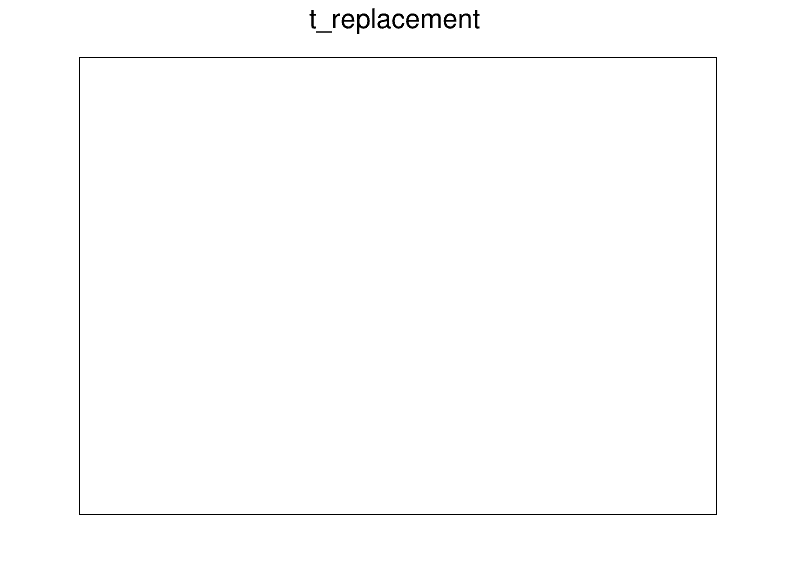

In [6]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()